In [1]:
%matplotlib notebook

from combine.philip_zb_w7xt_version2 import gen_grid
from matplotlib import cm, pyplot as plt
import ipywidgets as widgets
import numpy as np

from combine.quick_g import multi_bump, widget_g_plot
import combine.grid_analyze_version2 as ga

In [5]:
consts = {
        # in -> outside cell numbers (sum is redial resolution)
        "NirC": 10, "NirS": 5, "NirN": 5,
        # half(-1/2) poloidal and toroidal cell number (per half-module)
        "Niphalf": 50, "Nit": 35,
        # poloidal grid spacing and smoothing options implemented by phg
        "eq_space": True, "eq_space_vessel": True, "zoidpol": False,
        "project_from_normal": True, # proj for first vessel point
        # starting angle in [0,Nit[ and offset list of projection center
        "trace_index": 35, "center_delta_R": .15, # [0,0,0,0.2,.15],
        # path to magnetic field file
        "magnetic_field_file": "./Fields/Field-EIM-FullT-std.dat", # ErrFullT- FullT-
        "configuration": "EIM", # overwrites more specific changes
        "module": "full_module", # or "half_module" or "full_torus"
        "module_index": 0 # from 0 to 4 for starting position
    }

# shift spacings around
size = consts["Niphalf"]*2+1, consts["Nit"]*2-1 # Nitfull
scales_mus_covs = [
    [ 0.0,  [0.1 ,0   ], [[15,0],[0,10]]],
]

In [6]:
consts["vessel_pdf"] = multi_bump(size, scales_mus_covs)
g = gen_grid(consts, all_grids_folder=False)

GRID AND B FIELD RANGE MISSMATCH
[21. 73.  5.  0.  0.  1.  4.]
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


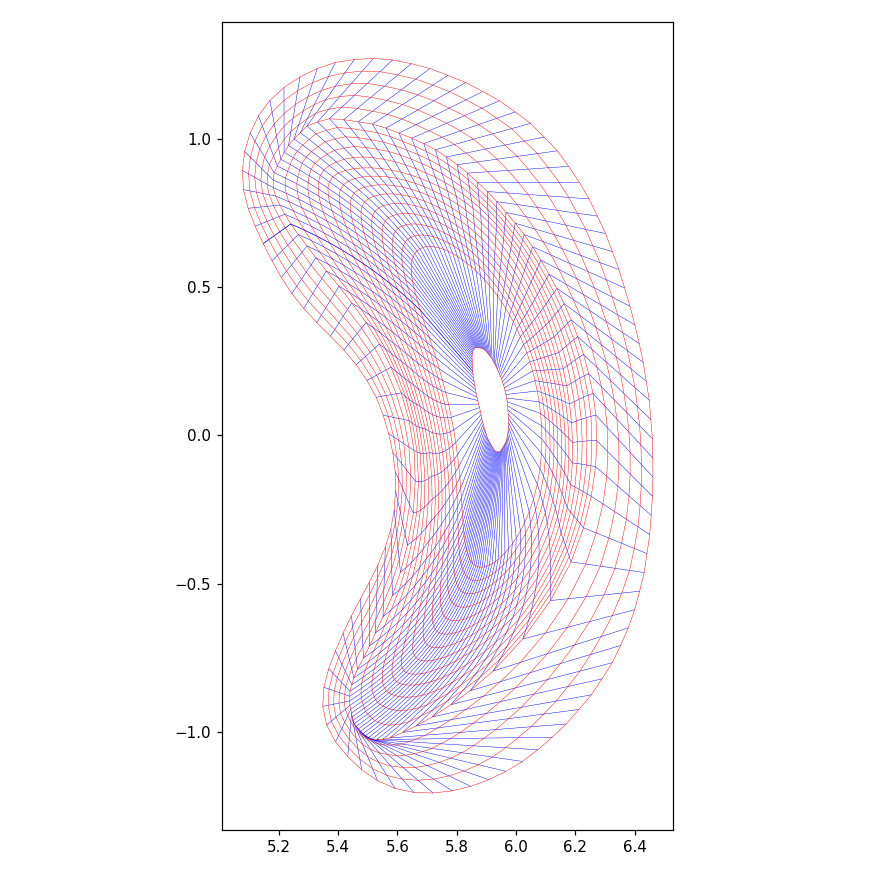

interactive(children=(IntSlider(value=0, description='phi', max=68), Output()), _dom_classes=('widget-interact…

In [7]:
widget_g_plot(g)

<IPython.core.display.Javascript object>


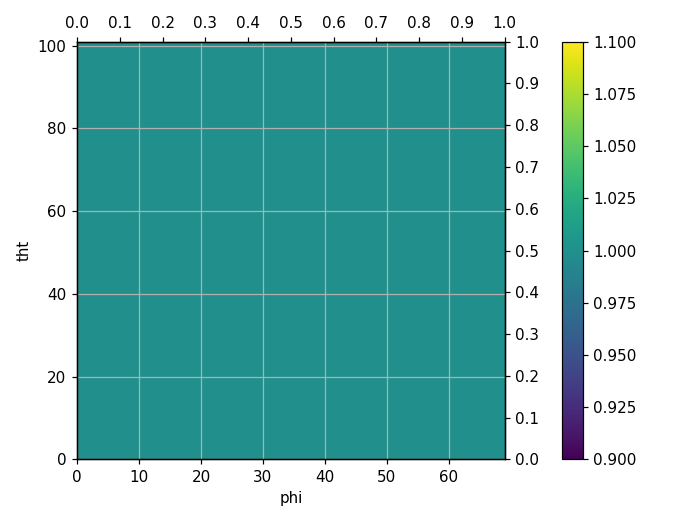

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  


In [15]:
cnst2 = consts
norm = cnst2["vessel_pdf"] / np.sum(cnst2["vessel_pdf"], axis=0)
norm = norm * norm.shape[0]  # rescale to 1
fig, ax = plt.subplots()
cb = ax.pcolormesh(norm)
ax.set_ylabel("tht"); ax.set_xlabel("phi")
ax2 = ax.twiny(); ax2.set_xlim(ax.get_xlim())
nx2tl = np.linspace(*ax.get_xlim(), 11)  # new axes2 tick locations
ax2.set_xticks(nx2tl), ax2.set_xticklabels( (nx2tl/ax.get_xlim()[1]).astype("U3") )
ax3 = ax.twinx(); ax3.set_ylim(ax.get_ylim())
nx3tl = np.linspace(*ax.get_ylim(), 11)  # new axes3 tick locations
ax3.set_yticks(nx3tl), ax3.set_yticklabels(np.linspace(0,1,11).astype("U3") )
fig.tight_layout()
fig.colorbar(cb, pad=0.1)
ax.grid()

In [8]:
old_scales_mus_covs = [
    [ 0.4,  [0.1 ,0   ], [[15,0],[0,10]]],
    [-0.45, [0.35,0   ], [[25,0],[0,10]]],
    [-0.25, [0.85,0   ], [[10,0],[0,10]]],
    [ 0.2,  [0.1 ,0.2 ], [[10,0],[0,10]]],
    [-0.15, [0.7 ,0.4 ], [[35,0],[0,10]]], 
    [0.5,   [1   ,0.45], [[5,0],[0,13]]],
    [0.1,   [0.7 ,0   ], [[5,0],[0,5]]],
    [-0.1,  [1   ,0   ], [[10,0],[0,5]]],
    [0.3,   [0.05,0.55], [[20,-15],[-15,30]]],
    [0.3,   [0   ,0.65], [[15,0],[0,5]]],
    [0.2,   [0   ,0.75], [[10,0],[0,15]]],
    [-0.4,  [0.2 ,0.45], [[5,0],[0,10]]],
    [-0.5,  [0.20, 0.65],[[8,0],[0,10]]],
    [-0.4,  [0.20,0.65], [[5,0],[0,5]]],
    [0.2,   [0.34,0.65], [[5,0],[0,5]]],
    [0.2,   [0.30,0.66], [[5,0],[0,5]]],
    [-0.5,  [0.24,0.85], [[5,0],[0,5]]],
    [0.2,   [0.34,0.85], [[5,0],[0,5]]],
    [0.2,   [0.30,0.86], [[5,0],[0,5]]],
    [-0.3,  [0.8,0.65],  [[30,0],[0,10]]],
    [0.1,   [0.7,0.85],  [[20,0],[0,10]]],
    [-0.15, [0.85,0.85], [[20,0],[0,10]]],    
    [0.1,   [0.35,0.95], [[20,0],[0,10]]],
    [-0.1,  [0.85,0.95], [[20,0],[0,10]]],   
    [0.6,   [0   ,1   ], [[20,0],[0,10]]],    
    [-0.6,  [0.25,1   ], [[20,0],[0,10]]],
    [0.4,   [0.4 ,1   ], [[10,0],[0,10]]],
    [0.6,   [0.45,1   ], [[10,0],[0,10]]],
]